In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
plt.style.use('dark_background')

In [61]:
# data = pd.read_parquet("./data/model-20250313_0917-RLE02_.parquet")
data = pd.read_parquet("./data/model-20250313_0917-RLE02_mntOL.parquet")
data.keys()

Index(['OSSPayloads6D', 'OSS00GroundAcc', 'Pier6D', 'OSS00Ground6D',
       'MountEncoders'],
      dtype='object')

In [62]:
acc = np.vstack(data["OSS00GroundAcc"])
mnt_enc = np.vstack(data["MountEncoders"])
payload_D = np.vstack(data["OSSPayloads6D"])
(N, ny) = payload_D.shape

In [63]:
tk = 0.001*np.linspace(0, N-1, num=N)
tk[:4]

array([0.   , 0.001, 0.002, 0.003])

Text(0.5, 1.0, 'RLE Acc (m/s^2)')

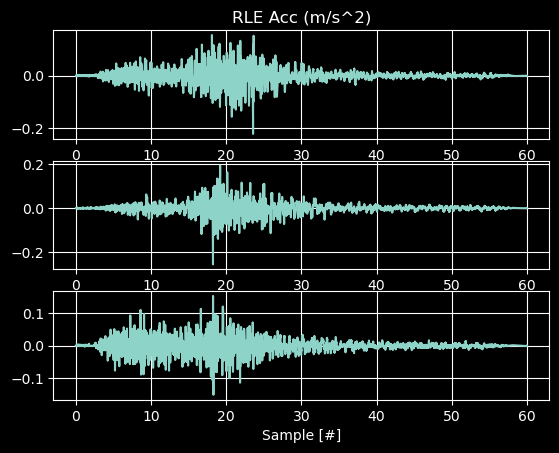

In [64]:
fig,ax = plt.subplots(3,1)
for i in range(3):
    ax[i].plot(tk, acc[:,i])
    ax[i].grid()    
    ax[i].set_xlabel("Sample [#]")
ax[0].set_title("RLE Acc (m/s^2)")

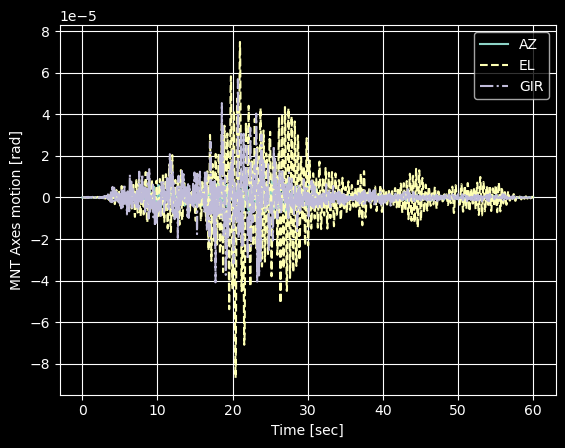

In [ ]:
fig,ax = plt.subplots()
ax.plot(tk, np.mean(mnt_enc[:,:4],1))
ax.plot(tk, np.mean(mnt_enc[:,4:10],1),'--')
ax.plot(tk, np.mean(mnt_enc[:,-4:],1),'-.')
ax.grid()
ax.set_ylabel("MNT Axes motion [rad]")
ax.set_xlabel("Time [sec]")
ax.legend(("AZ","EL","GIR"))

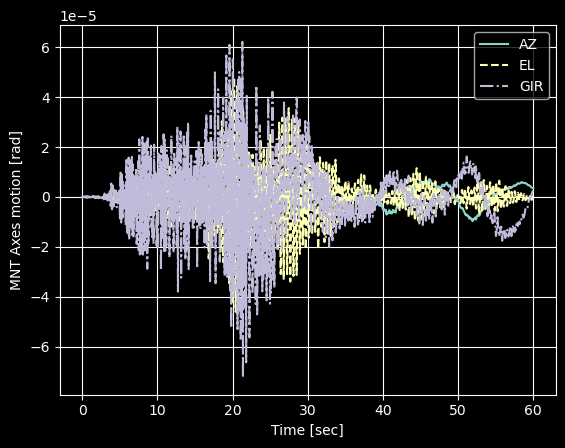

In [65]:
fig,ax = plt.subplots()
ax.plot(tk, np.mean(mnt_enc[:,:4],1))
ax.plot(tk, np.mean(mnt_enc[:,4:10],1),'--')
ax.plot(tk, np.mean(mnt_enc[:,-4:],1),'-.')
ax.grid()
ax.set_ylabel("MNT Axes motion [rad]")
ax.set_xlabel("Time [sec]")
ax.legend(("AZ","EL","GIR"))

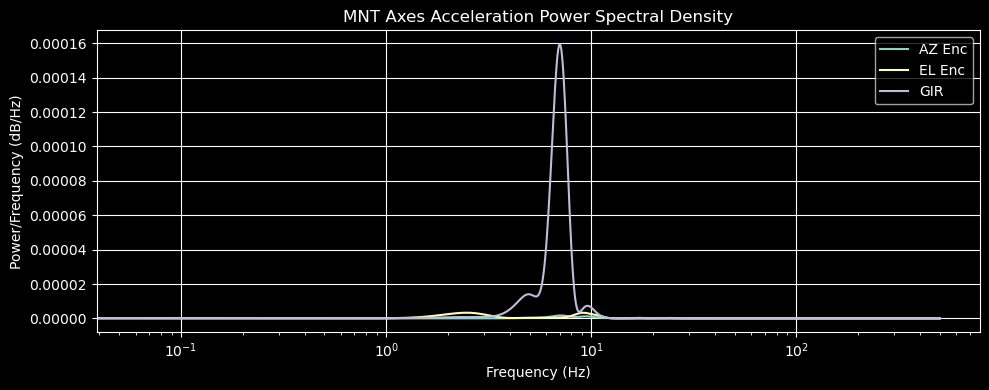

In [66]:
# # Method 2: Using finite difference approximation
# def second_derivative_finite_diff(y, dx):
#     # Central difference formula: f''(x) ≈ [f(x+h) - 2f(x) + f(x-h)] / h²
#     y_padded = np.pad(y, (1, 1), 'edge')  # Pad to handle boundaries
#     deriv = (y_padded[2:] - 2*y_padded[1:-1] + y_padded[:-2]) / (dx**2)
#     return deriv

# dx = tk[1] - tk[0]  # step size
# ELacc_ = second_derivative_finite_diff(np.mean(mnt_enc[:,4:10],1), dx)

AZacc = np.gradient(np.gradient(np.mean(mnt_enc[:,:4],1), tk), tk)
ELacc = np.gradient(np.gradient(np.mean(mnt_enc[:,4:10],1), tk), tk)
GIRacc = np.gradient(np.gradient(np.mean(mnt_enc[:,-4:],1), tk), tk)

# Calculate PSD using Welch's method
frequencies, AZpsd = signal.welch(AZacc, 1e3, nfft=2**14, nperseg=1024)
frequencies, ELpsd = signal.welch(ELacc, 1e3, nfft=2**14, nperseg=1024)
frequencies, GIRpsd = signal.welch(GIRacc, 1e3, nfft=2**14, nperseg=1024)

# Plot the results
plt.figure(figsize=(10, 4))
plt.semilogx(frequencies, AZpsd)
plt.semilogx(frequencies, ELpsd)
plt.semilogx(frequencies, GIRpsd)
plt.title('MNT Axes Acceleration Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend(("AZ Enc","EL Enc","GIR"))
plt.grid(True)
plt.tight_layout()
plt.show()

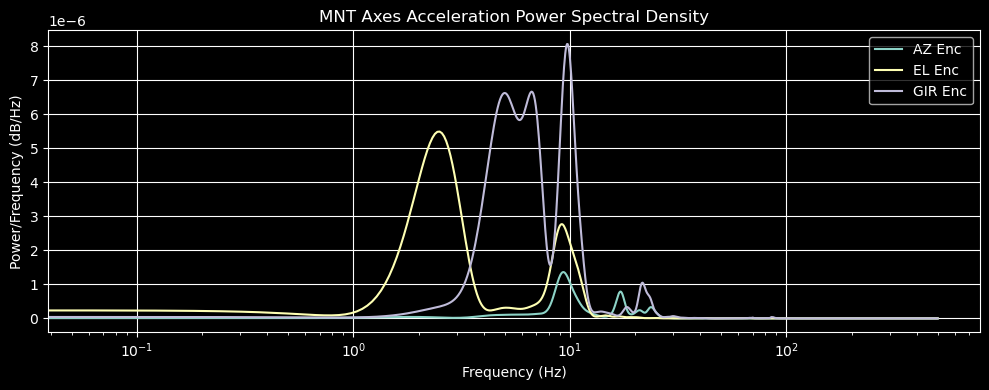

In [ ]:

# # Method 2: Using finite difference approximation
# def second_derivative_finite_diff(y, dx):
#     # Central difference formula: f''(x) ≈ [f(x+h) - 2f(x) + f(x-h)] / h²
#     y_padded = np.pad(y, (1, 1), 'edge')  # Pad to handle boundaries
#     deriv = (y_padded[2:] - 2*y_padded[1:-1] + y_padded[:-2]) / (dx**2)
#     return deriv

# dx = tk[1] - tk[0]  # step size
# ELacc_ = second_derivative_finite_diff(np.mean(mnt_enc[:,4:10],1), dx)

AZacc = np.gradient(np.gradient(np.mean(mnt_enc[:,:4],1), tk), tk)
ELacc = np.gradient(np.gradient(np.mean(mnt_enc[:,4:10],1), tk), tk)
GIRacc = np.gradient(np.gradient(np.mean(mnt_enc[:,-4:],1), tk), tk)

# Calculate PSD using Welch's method
frequencies, AZpsd = signal.welch(AZacc, 1e3, nfft=2**14, nperseg=1024)
frequencies, ELpsd = signal.welch(ELacc, 1e3, nfft=2**14, nperseg=1024)
frequencies, GIRpsd = signal.welch(GIRacc, 1e3, nfft=2**14, nperseg=1024)

# Plot the results
plt.figure(figsize=(10, 4))
plt.semilogx(frequencies, AZpsd)
plt.semilogx(frequencies, ELpsd)
plt.semilogx(frequencies, GIRpsd)
plt.title('MNT Axes Acceleration Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend(("AZ Enc","EL Enc","GIR"))
plt.grid(True)
plt.tight_layout()
plt.show()

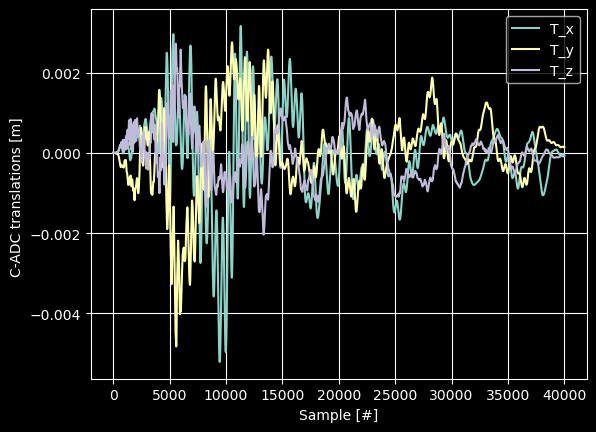

In [10]:
fig,ax = plt.subplots()
ax.plot(payload_D[:,12:15])
ax.grid()
ax.set_ylabel("C-ADC translations [m] ")
ax.set_xlabel("Sample [#]")
ax.legend(("T_x","T_y","T_z"))